In [1]:
# Import libraries

import matplotlib.path as mpath
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import rc
from IPython.display import HTML
import numpy as np
import math

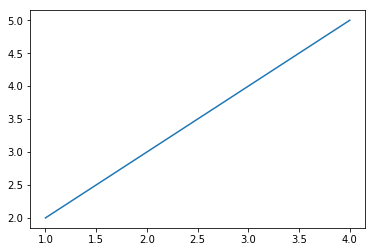

In [2]:
# Plot a simple straight line 
# First array is x coordinates, second is y coordinates

plt.plot([1,2,3,4], [2,3,4,5])
plt.show()

In [3]:
# Define blending funcitons from ioflo

def blend0(d = 0.0, u = 1.0, s = 1.0):
    d = float(abs(d))
    u = float(abs(u))
    s = float(abs(s))
    v = d - u #offset by radius

    if v >= s:  #first so if s == 0 catches here so no divide by zero below
        b = 0.0
    elif v <= 0.0:
        b = 1.0
    else: # 0 < v < s
        b = 1.0 - (v / s)
    return b

def blend1(d = 0.0, u = 1.0, s = 1.0):
    v = float(abs(u * s)) #scale uncertainty radius make sure positive
    a = float(abs(d)) #symmetric about origin

    if a >= v or v == 0.0 : #outside uncertainty radius accept delta
        b = 1.0
    elif a < v/2.0: # inside 1/2 uncertainty radius closer to 0
        b = 2.0 * (a * a)/(v * v)
    else: #greater than 1/2 uncertainty radius closer to 1
        b = 1.0 - (2.0 * (a - v) * (a - v))/ (v * v)
        
    return b

def blend2(d = 0.0, u = 1.0, s = 5.0):
    d = float(d)
    u = float(u)
    s = float(abs(s)) # make sure positive

    b = 1.0 - math.exp( - s * (d * d)/(u * u))

    return b

def blend3(d = 0.0, u = 1.0, s = 0.05):
    d = float(d)
    u = float(u)
    s = min(1.0,float(abs(s))) # make sure positive <= 1.0

    b = 1.0 - s ** ((d * d)/(u * u))

    return b

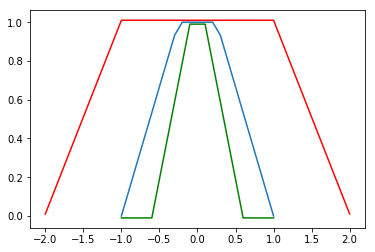

In [76]:
# Plot and display tests results of the blend0() funciton

ss = 0.1 # step size
s = .75  # uncertainty(?)
u = .25  # radius
out = []
i = np.linspace(-1,1,21)
for x in range(len(i)):
    b = blend0(i[x],u,s)
    out.append((round(i[x],3), round(b,3)))

yCoord = []
xCoord = []
for i in range(len(out)):
    xCoord.append(out[i][0])
    yCoord.append(out[i][1])
plt.plot(xCoord, yCoord)

out = []
i = np.linspace(-2,2,41)
for x in range(len(i)):
    b = blend0(i[x])
    out.append((round(i[x],3), round(b,3)))

yCoord = []
xCoord = []
for i in range(len(out)):
    xCoord.append(out[i][0])
    yCoord.append(out[i][1]+.01)
plt.plot(xCoord, yCoord, color='red')

out = []
i = np.linspace(-1,1,21)
for x in range(len(i)):
    b = blend0(i[x], 0.1, 0.5)
    out.append((round(i[x],3), round(b,3)))

yCoord = []
xCoord = []
for i in range(len(out)):
    xCoord.append(out[i][0])
    yCoord.append(out[i][1]-.01)
plt.plot(xCoord, yCoord, color='green')

plt.show()

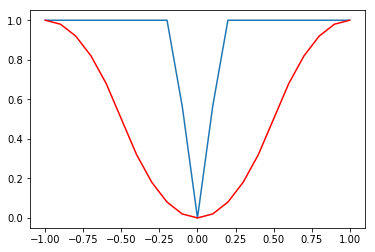

In [67]:
# Plot and display tests results of the blend1() funciton

out = []
i = np.linspace(-1,1,21)
for x in range(len(i)):
    b = blend1(i[x],u,s)
    out.append((round(i[x],3), round(b,3)))
    
yCoord = []
xCoord = []

for i in range(len(out)):
    xCoord.append(out[i][0])
    yCoord.append(out[i][1])
plt.plot(xCoord, yCoord)

out = []
i = np.linspace(-1,1,21)
for x in range(len(i)):
    b = blend1(i[x])
    out.append((round(i[x],3), round(b,3)))
    
yCoord = []
xCoord = []

for i in range(len(out)):
    xCoord.append(out[i][0])
    yCoord.append(out[i][1])
plt.plot(xCoord, yCoord, color='red')

plt.show()

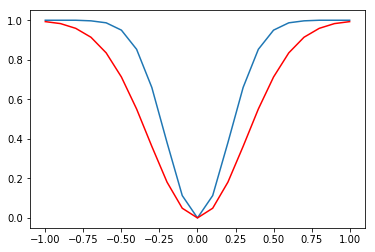

In [70]:
# Plot and display tests results of the blend2() funciton

out = []
i = np.linspace(-1,1,21)
for x in range(len(i)):
    b = blend2(i[x],u,s)
    out.append((round(i[x],3), round(b,3)))
    
yCoord = []
xCoord = []

for i in range(len(out)):
    xCoord.append(out[i][0])
    yCoord.append(out[i][1])
plt.plot(xCoord, yCoord)

out = []
i = np.linspace(-1,1,21)
for x in range(len(i)):
    b = blend2(i[x])
    out.append((round(i[x],3), round(b,3)))
    
yCoord = []
xCoord = []

for i in range(len(out)):
    xCoord.append(out[i][0])
    yCoord.append(out[i][1])
plt.plot(xCoord, yCoord, color='red')

plt.show()

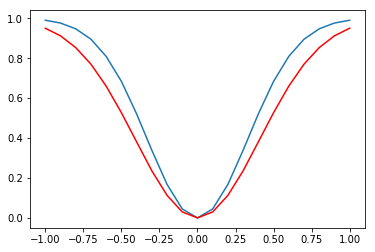

In [72]:
# Plot and display tests results of the blend3() funciton

out = []
i = np.linspace(-1,1,21)
for x in range(len(i)):
    b = blend3(i[x],u,s)
    out.append((round(i[x],3), round(b,3)))
    
yCoord = []
xCoord = []

for i in range(len(out)):
    xCoord.append(out[i][0])
    yCoord.append(out[i][1])
plt.plot(xCoord, yCoord)

out = []
i = np.linspace(-1,1,21)
for x in range(len(i)):
    b = blend3(i[x])
    out.append((round(i[x],3), round(b,3)))
    
yCoord = []
xCoord = []

for i in range(len(out)):
    xCoord.append(out[i][0])
    yCoord.append(out[i][1])
plt.plot(xCoord, yCoord, color='red')

plt.show()

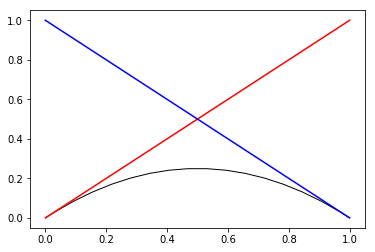

In [27]:
# Just testing

Path = mpath.Path

fig, ax = plt.subplots()
pp1 = mpatches.PathPatch(
    Path([(0, 0), (0.5, 0.5), (1, 0)],
         [Path.MOVETO, Path.CURVE3, Path.CURVE3]),
    fc="none", transform=ax.transData)

ax.add_patch(pp1)
plt.plot([0,1], [0,1], color='red')
plt.plot([0,1], [1,0], color='blue')


plt.show()

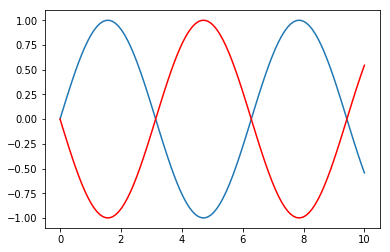

In [28]:
# Just testing

x = np.linspace(0,10,100)
y = np.sin(x)
z = -np.sin(x)
plt.plot(x,y)
plt.plot(x,z, color='red')
plt.show()